**Mount Drive**

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import Libraries**

In [2]:
import numpy as nup
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
import cv2
from PIL import Image, ImageDraw, ImageFilter
import glob 
%matplotlib inline

**Path**

In [3]:
#path = '/content/drive/MyDrive/Computer Vision/Image Processing/Data/'

**Original Image**

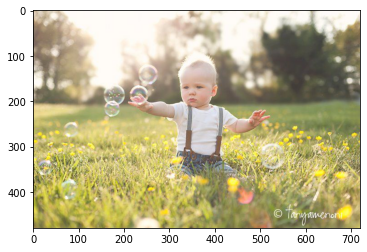

In [4]:
kid = Image.open('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')
plt.imshow(kid)
plt.show()

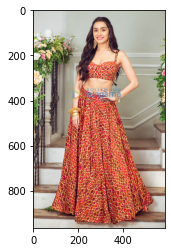

In [5]:
shraddha = Image.open('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')
plt.imshow(shraddha)
plt.show()

In [25]:
x = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')

In [28]:
y = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')

#**Adding Gaussian Noise**

In [8]:
import numpy as np
import os
import cv2

def noisy(noise_typ,image):
   if noise_typ == "gauss":
      row,col,ch= image.shape
      mean = 0
      var = 0.1
      sigma = var**0.5
      gauss = np.random.normal(mean,sigma,(row,col,ch))
      gauss = gauss.reshape(row,col,ch)
      noisy = image + gauss
      return noisy
   elif noise_typ == "s&p":
      row,col,ch = image.shape
      s_vs_p = 0.5
      amount = 0.004
      out = np.copy(image)
      # Salt mode
      num_salt = np.ceil(amount * image.size * s_vs_p)
      coords = [np.random.randint(0, i - 1, int(num_salt))
              for i in image.shape]
      out[coords] = 1

      # Pepper mode
      num_pepper = np.ceil(amount* image.size * (1. - s_vs_p))
      coords = [np.random.randint(0, i - 1, int(num_pepper))
              for i in image.shape]
      out[coords] = 0
      return out
   elif noise_typ == "poisson":
      vals = len(np.unique(image))
      vals = 2 ** np.ceil(np.log2(vals))
      noisy = np.random.poisson(image * vals) / float(vals)
      return noisy

   elif noise_typ =="speckle":
      row,col,ch = image.shape
      gauss = np.random.randn(row,col,ch)
      gauss = gauss.reshape(row,col,ch)        
      noisy = image + image * gauss
      return noisy

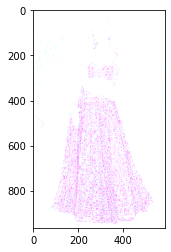

In [27]:
gyan1 = noisy('gauss', x)
plt.imshow(gyan1)
plt.show()

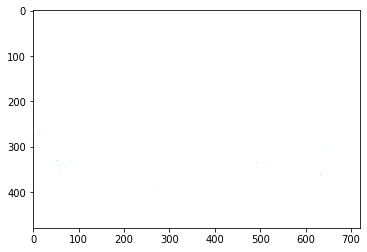

In [29]:
gyan2 = noisy('gauss', y)
plt.imshow(gyan2)
plt.show()

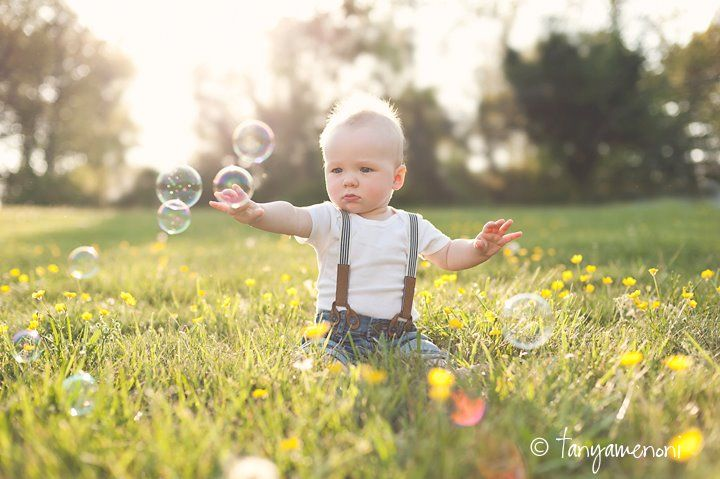

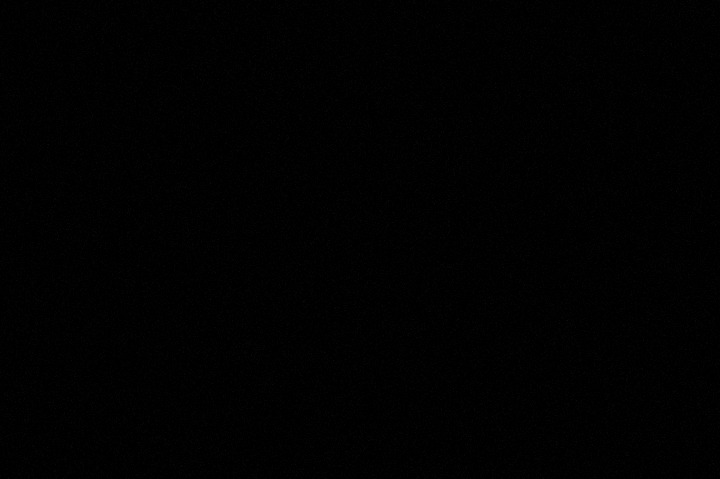

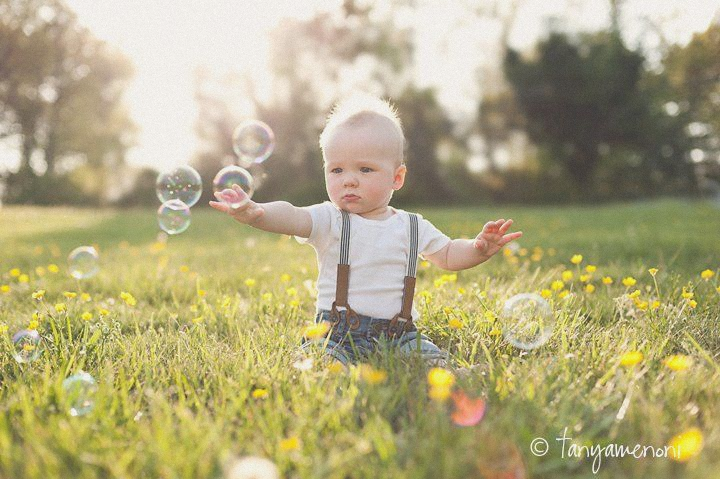

In [31]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

mean = 0
var = 10
sigma = var ** 0.5
#gaussian = np.random.normal(mean, sigma, (224, 224)) 
gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))



for image in glob.glob('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg'):
    img = cv2.imread(image)
    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        #noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        #noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        #noisy_image[:, :, 2] = img[:, :, 2] + gaussian
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

        cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
        noisy_image = noisy_image.astype(np.uint8)

        #cv2.imshow("img", img)
        #cv2.imshow("gaussian", gaussian)
        #cv2.imshow("noisy", noisy_image)

        cv2_imshow(img)
        cv2_imshow(gaussian)
        cv2_imshow(noisy_image)

        cv2.waitKey(0)

In [33]:
import numpy as np
import cv2
import glob
from google.colab.patches import cv2_imshow

mean = 0
var = 10
sigma = var ** 0.5
#gaussian = np.random.normal(mean, sigma, (224, 224)) 
gaussian = np.random.normal(mean, sigma, (img.shape[0],img.shape[1]))



for image in glob.glob('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg'):
    img = cv2.imread(image)
    noisy_image = np.zeros(img.shape, np.float32)

    if len(img.shape) == 2:
        noisy_image = img + gaussian
    else:
        #noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        #noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        #noisy_image[:, :, 2] = img[:, :, 2] + gaussian
        noisy_image[:, :, 0] = img[:, :, 0] + gaussian
        noisy_image[:, :, 1] = img[:, :, 1] + gaussian
        noisy_image[:, :, 2] = img[:, :, 2] + gaussian

        cv2.normalize(noisy_image, noisy_image, 0, 255, cv2.NORM_MINMAX, dtype=-1)
        noisy_image = noisy_image.astype(np.uint8)

        #cv2.imshow("img", img)
        #cv2.imshow("gaussian", gaussian)
        #cv2.imshow("noisy", noisy_image)

        cv2_imshow(img)
        cv2_imshow(gaussian)
        cv2_imshow(noisy_image)

        cv2.waitKey(0)

Output hidden; open in https://colab.research.google.com to view.

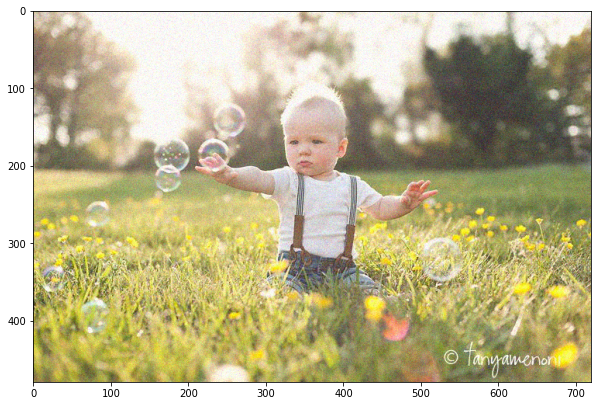

In [35]:
from PIL import Image
import numpy as np
from skimage.util import random_noise

im = Image.open("/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg")
# convert PIL Image to ndarray
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
noise_img = random_noise(im_arr, mode='gaussian', var=0.05**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)
img.show()
plt.figure(figsize=(10,15))
plt.imshow(noise_img)

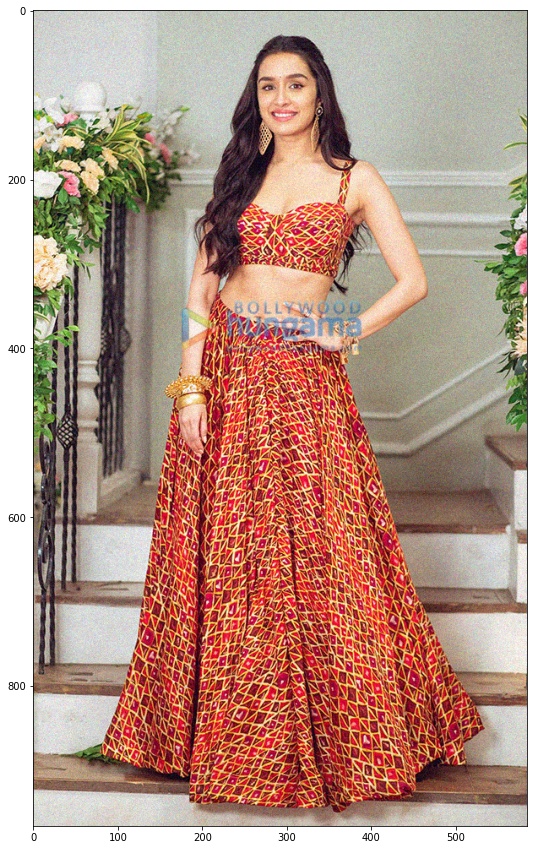

In [34]:
from PIL import Image
import numpy as np
from skimage.util import random_noise

im = Image.open("/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg")
# convert PIL Image to ndarray
im_arr = np.asarray(im)

# random_noise() method will convert image in [0, 255] to [0, 1.0],
# inherently it use np.random.normal() to create normal distribution
# and adds the generated noised back to image
noise_img = random_noise(im_arr, mode='gaussian', var=0.05**2)
noise_img = (255*noise_img).astype(np.uint8)

img = Image.fromarray(noise_img)
img.show()
plt.figure(figsize=(10,15))
plt.imshow(noise_img)

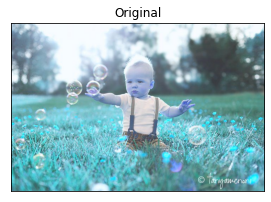

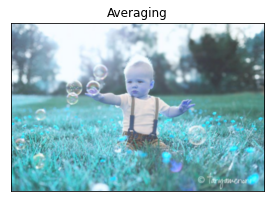

In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(10,15)),plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.figure(figsize=(10,15)),plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]),plt.yticks([])

#cv2.imwrite('gaussfiltered.jpg', blur)
plt.show()

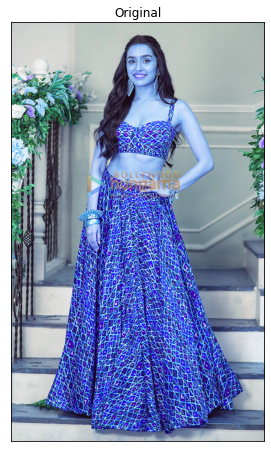

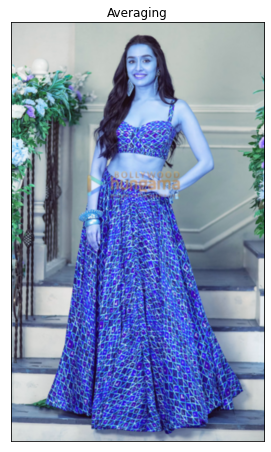

In [47]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')
blur = cv2.GaussianBlur(img,(5,5),0)

plt.figure(figsize=(10,15)),plt.subplot(121),plt.imshow(img),plt.title('Original')
plt.xticks([]),plt.yticks([])
plt.figure(figsize=(10,15)),plt.subplot(122),plt.imshow(blur),plt.title('Averaging')
plt.xticks([]),plt.yticks([])

#cv2.imwrite('gaussfiltered.jpg', blur)
plt.show()

#**Denoising Image**

S.no.	Function Name	Description

1	cv2.fastNlMeansDenoising()	- Works for single Grayscale Image

2	cv2.fastNlMeansDenoisingColored()	- Works for Colored Image

3	cv2.fastNlMeansDenoisingMulti() 	- Works for a sequence of Grayscale Image

4	cv2.fastNlMeansDenoisingColoredMulti()	- Works for a sequence of Colored Image

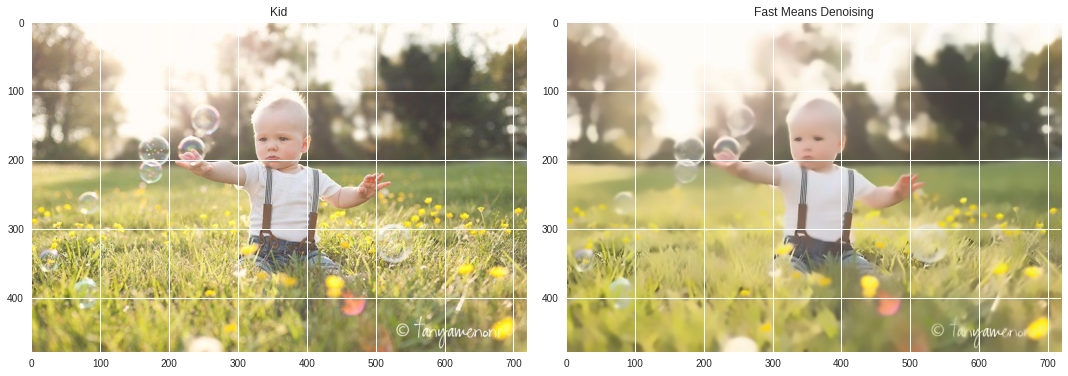

In [50]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
 
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')
dst = cv2.fastNlMeansDenoisingColored(image, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Kid')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.show()

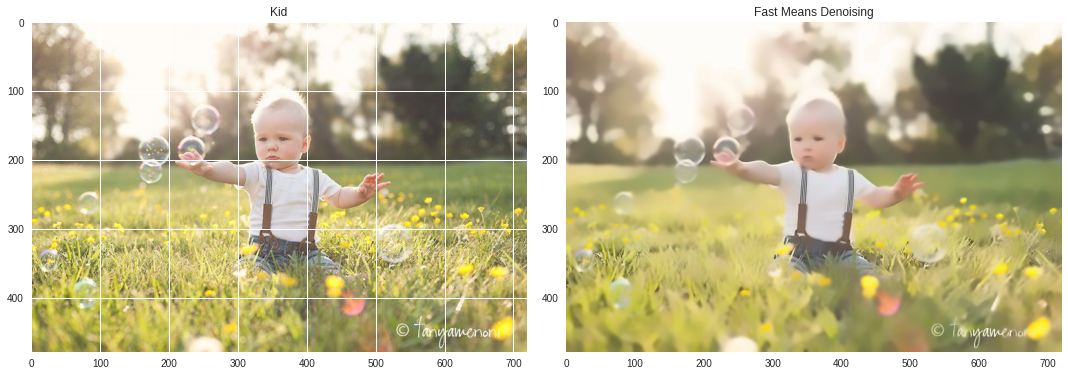

In [51]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
 
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/kid.jpg')
dst = cv2.fastNlMeansDenoisingColored(image, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Kid')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.grid(False)
plt.show()

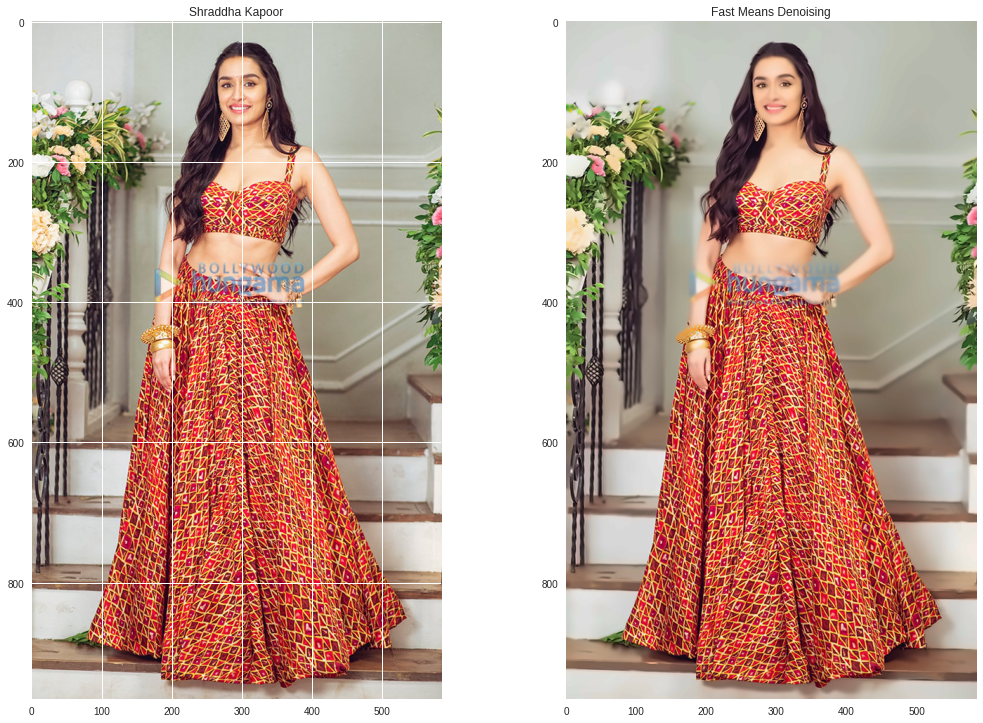

In [55]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn')
 
image = cv2.imread('/content/drive/MyDrive/Computer Vision/Image Processing/Data/Shraddha.jpg')
dst = cv2.fastNlMeansDenoisingColored(image, None, 11, 6, 7, 21)
 
row, col = 1, 2
fig, axs = plt.subplots(row, col, figsize=(15, 10))
fig.tight_layout()
axs[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axs[0].set_title('Shraddha Kapoor')
axs[1].imshow(cv2.cvtColor(dst, cv2.COLOR_BGR2RGB))
axs[1].set_title('Fast Means Denoising')
plt.grid(False)
plt.show()